# How to use the results of this study for further investigations

## Visualize a TIF file

One of the TIF files is opened with the `load_tif` function and plotted as image. Later it is plotted on a `cartopy` map.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

def load_tif(fname):
    ds = gdal.Open(fname)
    band = ds.GetRasterBand(1)
    zi = band.ReadAsArray()
    nan_ind = zi == band.GetNoDataValue()
    zi = zi * band.GetScale() + band.GetOffset()
    zi[nan_ind] = np.nan
    trans = ds.GetGeoTransform()
    extent = (trans[0], trans[0] + ds.RasterXSize*trans[1],
              trans[3] + ds.RasterYSize*trans[5], trans[3])
    ds = None
    return zi, extent

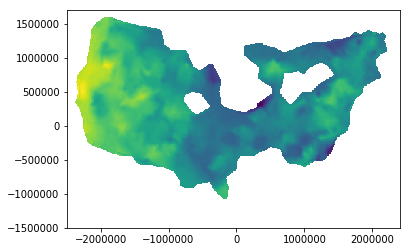

In [2]:
data, extent = load_tif('../results/tif/Qi_06.0Hz.tif')
im = plt.imshow(data, extent=extent, origin='upper')

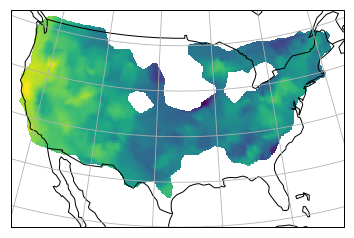

In [3]:
import cartopy.feature as cf
from cartopy import crs as ccrs

# projection used for the image
# see https://epsg.io/102003
AEA = ccrs.AlbersEqualArea(
    central_longitude=-96.0, central_latitude=37.5,
    false_easting=0.0, false_northing=0.0,
    standard_parallels=(29.5, 45.5),
    globe=ccrs.Globe(datum='NAD83', ellipse='GRS80'))

ax = plt.axes(projection=AEA)
ax.gridlines()
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
im = ax.imshow(data, extent=extent, origin='upper', transform=AEA)

## Extract attenuation parameters at a specific station

The JSON file with the results is opened and intrinsisc and scattering attenuation at a selected station are plotted versus frequency.

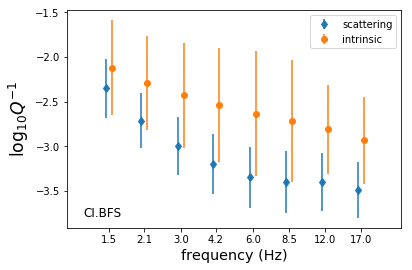

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
  
def plot_Q(station, results, ax=None):   
    freq = np.array(results['freqs'])
    Qsc = results['Qsc'][station]['mean']
    Qscerr = results['Qsc'][station]['error']
    Qi = results['Qi'][station]['mean']
    Qierr = results['Qi'][station]['error']
    if ax is None:
        ax = plt.subplot(111)
    ax.set_xscale('log')
    ax.errorbar(freq / 1.03, Qsc, Qscerr, fmt='d', label='scattering')
    ax.errorbar(freq * 1.03, Qi, Qierr, fmt='o', label='intrinsic')
    ax.legend()
    ax.set_xlim(1, 25)
    ax.set_xticks(freq)
    ax.set_xticklabels(freq)
    ax.set_xticks([], minor=True)
    ax.set_xlabel('frequency (Hz)', fontsize='x-large')
    ax.set_ylabel(r'$\log_{10}Q^{-1}$', fontsize='xx-large')
    ax.annotate(station, (0.05, 0.05), xycoords=('axes fraction'),
                fontsize='large')

with open('../results/results.json') as f:
    results = json.load(f)
    
plot_Q('CI.BFS', results)

## Find event parameters for specific earthquakes

The JSON file with the event results is loaded, rearranged and some earthuqkaes are selected by event id.

In [5]:
import json

with open('../results/eventresults.json') as f:
    eresults = json.load(f)

# convert dict of lists to list of dicts
eresults = [dict(zip(eresults, t)) for t in zip(*eresults.values())]

# loop through earthquakes to find event with specific ids
selection = []
for eres in eresults:
    if eres['id'] in ('2867342', '2868918'):
        selection.append(eres)
selection

[{'M0': 350929602822997.94,
  'Mw': 3.627,
  'depth': 5000.0,
  'fit_error': 0.302,
  'id': '2867342',
  'lat': 43.322,
  'lon': -110.718,
  'mag': 3.5,
  'omM': [480623895869771.06,
   468107996505571.0,
   266161406922334.53,
   253269863558007.5,
   147730010008464.16,
   79095588687962.03,
   28684397059993.39,
   9006374553678.21],
  'time': '2009-03-21T08:47:50.710000Z'},
 {'M0': 86239193919775.92,
  'Mw': 3.22,
  'depth': 6600.0,
  'fit_error': 0.312,
  'id': '2868918',
  'lat': 36.865,
  'lon': -104.864,
  'mag': 3.5,
  'omM': [100585830124430.6,
   127122389584567.56,
   79023164517696.23,
   54740087137040.18,
   56460834026705.13,
   38097020529343.92,
   22626532763709.74,
   10599401204594.6],
  'time': '2009-05-01T01:34:02.200000Z'}]